## Data Exploration for various Gamma, Epsilon, and Epsilon Decay Values
This data was generated iteratively by running various combination of these 3 values through 100 trails on the Smartcab Agent using Q-Learning.  Originally I was going to include alpha values as well, but changed to a time dependent alpha decay so that Q_hat converges to Q. 

In [15]:
import os
import pandas as pd

# create file list of all csv files in the csv_files directory
# the files are automatically created from output from the iterative cycles
file_list = [file for file in os.listdir('csv_files') if file.endswith(".csv")]

#need to insert before each file in file_list 
dir_loc = './csv_files/'

### Create one dataframe from all .csv file values 

In [53]:
# empty list will hold variable values and performance (# of successes in 100 trials)
success_list = []
success_dict = {}

# cycle through each file in file list collecting success rate 
for csv_file in file_list:
    dframe = pd.DataFrame.from_csv(dir_loc + csv_file)
    
    # get the variable values 
    variable_split = csv_file.split('_') 
    gamma = float(variable_split[1])
    epsilon = float(variable_split[3])
    epsilon_decay = float(variable_split[6][:-4])
    
    #check dframe for successes & failures
    success = len(dframe[dframe['Successful?'] == 'Yes'])
    
    success_list.append([gamma, epsilon, epsilon_decay, success])

# create dictionary 
for combination in success_list: 
    
    # first level dictionay
    if combination[0] not in success_dict:
        success_dict[combination[0]] = {}
        
    # second level dictionary nesting
    if combination[1] not in success_dict.get(combination[0], {}):
        success_dict[combination[0]][combination[1]] = {}
    
    # third level dictonary nesting
    if combination[2] not in success_dict.get(combination[0], {}).get(combination[1], {}):
        success_dict[combination[0]][combination[1]][combination[2]] = combination[3]
        

# test nesting
print success_dict[0.85][0.4][0.95]

43


In [104]:
def reform_dictionary(dictionary):
        """ Reforms the nested combination dictionary for prep for Dataframe convert."""
        reformed = []

        for gamma, level_one_dict in dictionary.items():
            for epsilon, level_two_dict in level_one_dict.items():
                for epsilon_decay, success in level_two_dict.items():
                    gamma_string = float(gamma)
                    epsilon_string = float(epsilon)
                    epsilon_decay_string = float(epsilon_decay)
                    success_value = int(success)
                    reformed.append({
                        'Gamma': gamma_string,
                        'Epsilon': epsilon_string,
                        'Epsilon Decay': epsilon_decay_string,
                        'Successes': success_value,
                        })

        return reformed

In [148]:
# reform the dictionary for a cleaner dataframe 
reformed_dict = reform_dictionary(success_dict)

# create dataframe from dict
dframe = pd.DataFrame.from_dict(reformed_dict)
dframe_indexed = dframe.set_index(['Gamma', 'Epsilon', 'Epsilon Decay'])
dframe_indexed.head()

Successes
Gamma Epsilon Epsilon Decay           
0.75  0.5     0.93                   7
              0.95                   7
              0.97                   5
              0.99                   7
      0.6     0.93                  49

### Plotting the Data 

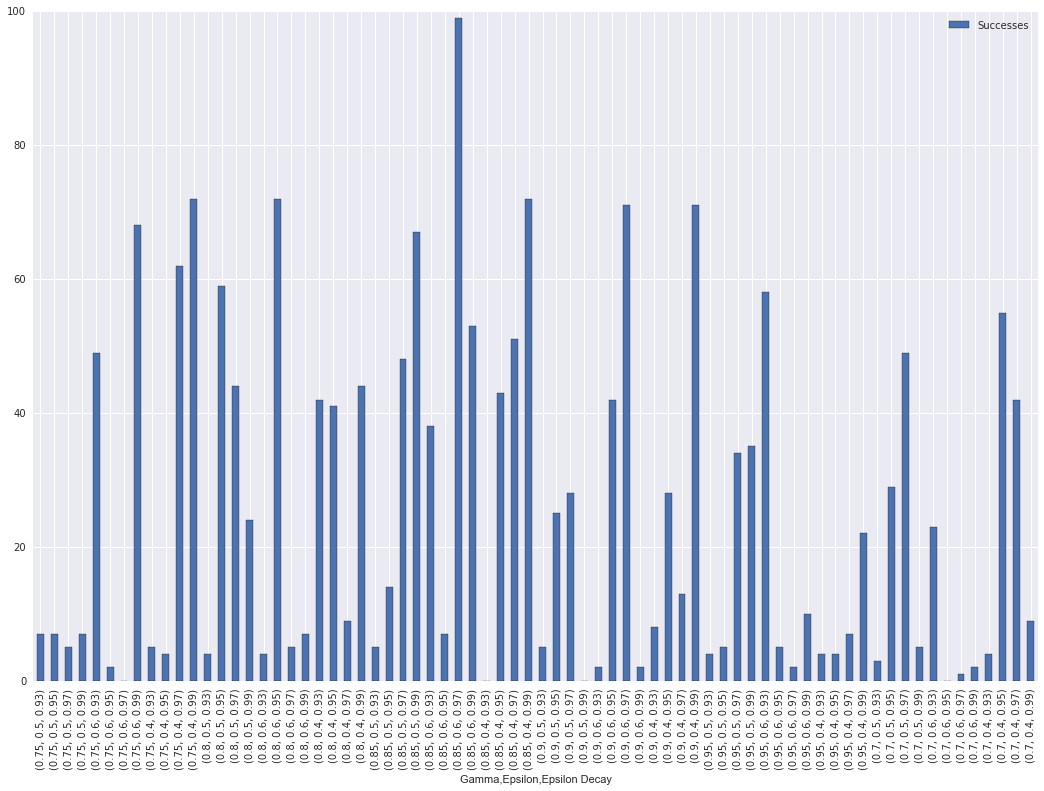

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (18, 12.0)

dframe_indexed.plot(kind='bar')

The clear winner in this case is Gamma = 0.85, Epsilon = 0.6, and Epsilon Decay = 0.97

### Box plots vs individual variables

#### Gamma vs Successes Plot

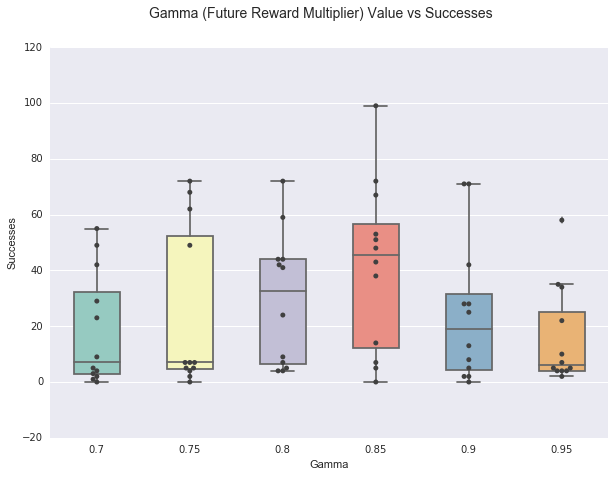

In [167]:
plt.rcParams['figure.figsize'] = (10, 7.0)
plt.suptitle('Gamma (Future Reward Multiplier) Value vs Successes', fontsize=14)
sns.boxplot(dframe['Gamma'], dframe['Successes'], palette="Set3", width=0.5)
sns.swarmplot(dframe['Gamma'], dframe['Successes'], color=".25")

Indvidual inspection shows that a Gamma Value of 0.85 seems to be the best performer (average) accross all Gamma values.  However the Standard Deviation is quite large, so my plan is to also look at Gamma of 0.80 which has a little tighter box plot and the second highest average if the performance from the winning combo is not consistent.

#### Epsilon Vs Successes Plot

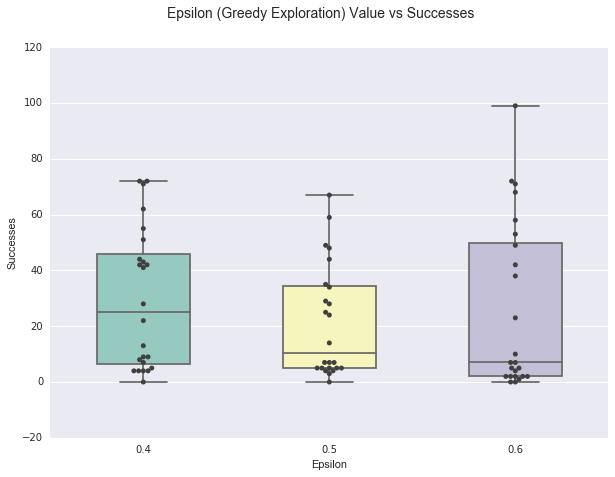

In [166]:
plt.suptitle('Epsilon (Greedy Exploration) Value vs Successes', fontsize=14)
sns.boxplot(dframe['Epsilon'], dframe['Successes'], palette="Set3", width=0.5)
sns.swarmplot(dframe['Epsilon'], dframe['Successes'], color=".25")

The highest average Epsilon value is 0.4, but since the max value was 0.6 I'm going to explore this value if the winning combination is not consistent 

#### Epsilon Decay vs Successes Plot

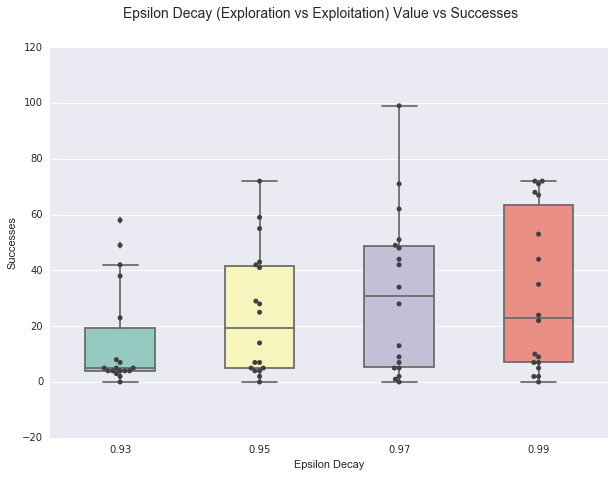

In [168]:
plt.suptitle('Epsilon Decay (Exploration vs Exploitation) Value vs Successes', fontsize=14)
sns.boxplot(dframe['Epsilon Decay'], dframe['Successes'], palette="Set3", width=0.5)
sns.swarmplot(dframe['Epsilon Decay'], dframe['Successes'], color=".25")

The epsilon decay value with the highest average in this case in 0.97 with 0.99 also showing promising results in the 60-80 successes range. 